In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import json
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.pyplot import figure
import tweets_utils
import importlib
%autosave 3600

Autosaving every 3600 seconds


# Indice

- [Verified create df](#verified)
- [Merge CCDH df](#merge_df)
- [Disinform Dozen vs Verified users behaviour](#ccdh_behaviour)
- [Plot timeline](#timeline)   
  ### General
    - [Stats](#stats)

  ### Interactions
    - [CCDH Top Users](#top_c)
    - [Verified Top Users](#top_v)
    
  ### Hashtags
    - [CCDH Hashtag used](#hastag_ccdh)
    - [Verified Hashtag used](#hastag_verified)
    
  ### Urls
    - [Urls CCDH](#ccdh_urls)
    - [Urls Verified](#ccdh_verified)
    - [Comparison distribution links](#distrib_link)
    
  ### Bot score
   - [CCDH bot score distribution](#ccdh_bot)
   - [Verified bot score distribution](#verified_bot)
   - [Comparison between distributions](#comp)
   
  ### Comparison Dozen and High credibility verified user
   - [Stats](#c_stats)
   - [Retweetted users](#rt)
   - [Link shared](#link_sh)
   - [Comparison hashtag](#comp_hashtag)

### Verified df
<a id="verified"/>

In [2]:
files_users = glob.glob("F:/COVID-19-Tweets/*/users.csv")
files_tweets = glob.glob("F:/COVID-19-Tweets/*/tweets.csv")
path_perc = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/")

In [3]:
names = []
users = []
verified = []
cols_users = [u'id', u'screen_name', u'verified'] 

cols_tweets = [
    u'user_id',u'user_screen_name', u'hashtags', u'urls', u'created_at',
    u'rt_user_screen_name', u'rt_user_id', 
    u'in_reply_to_screen_name', u'in_reply_to_user_id', 
    u'rt_created_at', u'in_reply_to_status_id'
              ]

In [54]:
chunksize = 10
for chunk in pd.read_csv(files_tweets[0], chunksize=10, lineterminator = '\n'):
    df = chunk
    break
df.info()

In [53]:
result = []
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_users:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_users, False))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        users.extend(lista[i]["users"])
        verified.extend(lista[i]["verified"])
        
for i in range(len(users)):
    if(verified[i] == True):
        names.append(users[i])
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

In [49]:
names = list(pd.Series(names).unique())
names

In [52]:
result = []
data = pd.DataFrame()
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_tweets, True, names))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        data = data.append(lista[i]["df"])
    print(len(data))
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

In [55]:
data = data.reset_index(drop=True)
data

In [51]:
path = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/")
data.to_csv(path[0] + "verified_tweets_w_data.csv", index=False)

In [56]:
del data

### Merge CCDH
<a id="merge_df"/>

In [60]:
path =  glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/")
path

['C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/']

In [61]:
# data.to_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/verified_tweets.csv", index=False)

In [62]:
cols = [
    u'id',u'user_id',u'user_screen_name',u'urls', u'hashtags',
    u'rt_user_screen_name', u'rt_user_id', 
    u'in_reply_to_screen_name', u'in_reply_to_user_id', 'created_at', 'retweet_count']

In [63]:
ccdh_original_complete = pd.read_csv(path[0] + "ccdh_tweets.csv", usecols = cols)
# ccdh_original_complete

In [10]:
ccdh_rt_complete = pd.read_csv(path[0] + "ccdh_retweets.csv", usecols = cols)
# ccdh_rt_complete

In [21]:
ccdh_rt_searched = pd.read_csv(path[0] + "ccdh_user_rt.csv")
# ccdh_rt_searched

In [22]:
ccdh_rp_searched = pd.read_csv(path[0] + "ccdh_user_rp.csv")
# ccdh_rp_searched

In [23]:
ccdh_original_searched = pd.read_csv(path[0] + "ccdh_original.csv")
# ccdh_original_searched

In [25]:
df = ccdh_original_complete.append(ccdh_rt_searched)
df = df.append(ccdh_rt_complete)
df = df.append(ccdh_rp_searched)
df = df.append(ccdh_original_searched)

In [26]:
df = df.reset_index(drop=True)

In [27]:
df.drop_duplicates(subset ="id", keep = False, inplace = True)

In [62]:
df

In [29]:
new_l = len(df)
old_sum = len(ccdh_original_complete) + len(ccdh_rt_complete) + len(ccdh_rt_searched) + len(ccdh_rp_searched) + len(ccdh_original_searched)
print(f"New df length: {new_l}")
print(f"Sum of all length: {(old_sum)}")
print(f"Diff: {old_sum - new_l}")

New df length: 129358
Sum of all length: 129736
Diff: 378


In [30]:
df.to_csv(path[0] + "ccdh_merged_tweets_w_dates.csv", index=False)

# Disinform Dozen vs Verified users behaviour
<a id="ccdh_behaviour"/>

In [4]:
path =  glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/")
df = pd.read_csv(path[0] + "ccdh_merged_tweets_w_dates.csv")
v_path = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/")
df_v = pd.read_csv(v_path[0] + "verified_tweets.csv")
# df_v

In [4]:
# df

In [5]:
original = df[df['rt_user_id'].isna() & df['in_reply_to_user_id'].isna()]
retweet = df[df['rt_user_id'].notna()]
reply = df[df['in_reply_to_user_id'].notna()]
total_len = len(df)
len_original = len(original)
len_rt = len(retweet)
len_rp = len(reply)

original_v = df_v[df_v['rt_user_id'].isna() & df_v['in_reply_to_user_id'].isna()]
retweet_v = df_v[df_v['rt_user_id'].notna()]
reply_v = df_v[df_v['in_reply_to_user_id'].notna()]
total_len_v = len(df_v)
len_original_v = len(original_v)
len_rt_v = len(retweet_v)
len_rp_v = len(reply_v)

In [6]:
path_disinform = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/")
disinform = pd.read_csv(path_disinform[0] + "disinformation_users.csv", usecols=[u"screen_name"])
importlib.reload(tweets_utils)
val = pd.Series(retweet["user_screen_name"])
value_d = []
value_u = []
for i in val:
    if(tweets_utils.found(i, disinform["screen_name"])):
        value_d.append(i)
    else:
        value_u.append(i)

In [7]:
original_ccdh = []
for i in original["user_screen_name"]:
    for j in disinform["screen_name"]:
        if i == j:
            original_ccdh.append(i)

rt_ccdh = []
for i in retweet["user_screen_name"]:
    for j in disinform["screen_name"]:
        if i == j:
            rt_ccdh.append(i)

rp_ccdh = []
for i in reply["user_screen_name"]:
    for j in disinform["screen_name"]:
        if i == j:
            rp_ccdh.append(i)
total_ccdh = len(original_ccdh) + len(rt_ccdh) + len(rp_ccdh)

total_i = total_len - (len(original_ccdh) + len(rt_ccdh) + len(rp_ccdh))
len_original_i = len_original - len(original_ccdh)
len_rt_i = len_rt - len(rt_ccdh)
len_rp_i = len_rp - len(rp_ccdh)

## Plot timeline
<a id="timeline"/>

In [64]:
dates = ccdh_original_complete["created_at"].dropna()
dates_formatted = []
for i in dates:
    x = i.split()[0]
    if("2" in x):
        dates_formatted.append(x)
    else:
        y = tweets_utils.process_datetime(i)
        dates_formatted.append(y)

In [73]:
fig = px.histogram(val)
fig.update_layout(
    title_text='Daily original tweets from Dozen', # title of plot
    xaxis_title_text='Tweet', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.1, 
    bargroupgap=0.1 
)
fig.show()

## Stats
<a id="stats"/>

In [9]:
list_ccdh = [len(original_ccdh)/total_ccdh, len(rt_ccdh)/total_ccdh, len(rp_ccdh)/total_ccdh]
label_ccdh = ["Original", "Retweet", "Reply"]
list_verified = [len_original_v/total_len_v, len_rt_v/total_len_v, len_rp_v/total_len_v]
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="sum", y=list_ccdh, x=label_ccdh, name="CCDH"))
fig.add_trace(go.Histogram(histfunc="sum", y=list_verified, x=label_ccdh, name="Verified"))
fig.update_layout(
    title="Differences between Dozen and Verified activity",
    xaxis_title="Kind of activity",
    yaxis_title="Percentage of activity",
    legend_title="Legend Title")
fig.show()

## CCDH Top Users
<a id="top_c" />

In [55]:
x = df_v["user_screen_name"].isin(list(disinform["screen_name"]))
for i in x:
    if i == True:
        print(i)

True
True
True
True
True
True
True
True


In [8]:
path_disinform = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/")
disinform = pd.read_csv(path_disinform[0] + "disinformation_users.csv")
disinform["screen_name"]

0             mercola
1     RobertKennedyJr
2         TyCharleneB
3             BusyDrT
4          IslamRizza
5            DrButtar
6      unhealthytruth
7          sayerjigmi
8       KellyBroganMD
9     DrChrisNorthrup
10       DrBenTapper1
11       kevdjenkins1
Name: screen_name, dtype: object

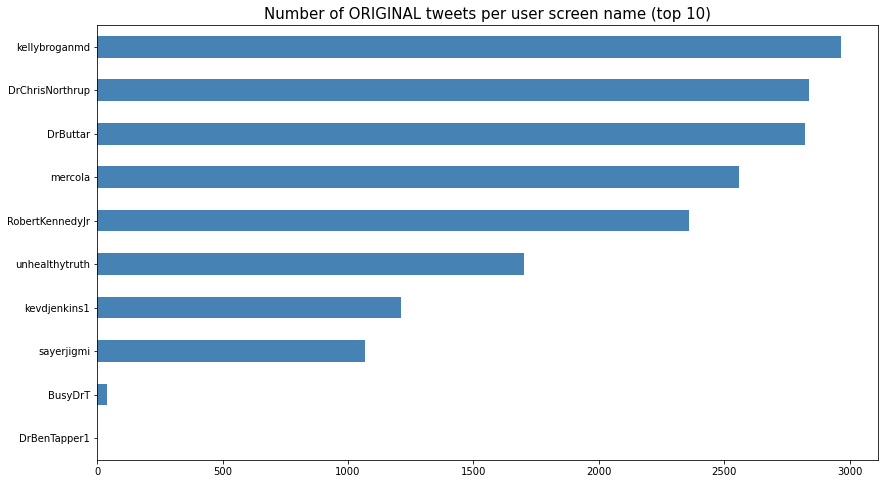

In [7]:
val = pd.Series(original["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:12].plot(kind='barh', color='steelblue', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of ORIGINAL tweets per user screen name (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

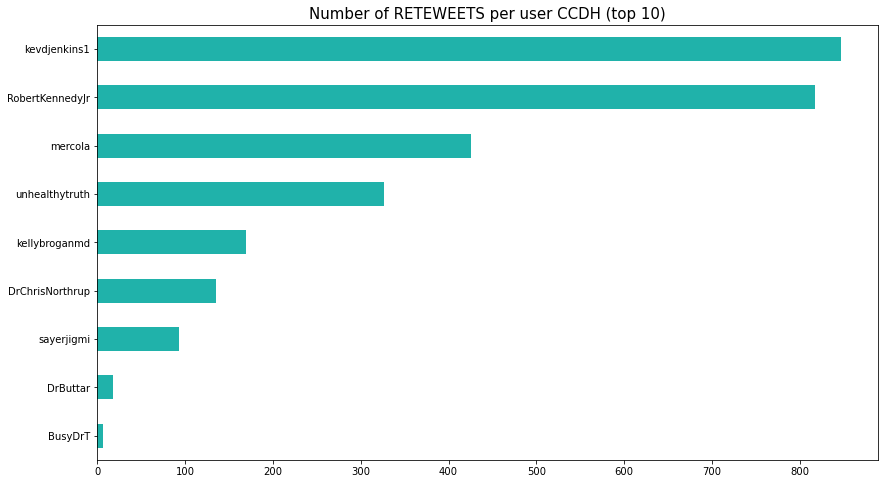

In [11]:
val = pd.Series(value_d)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:12].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of RETEWEETS per user CCDH (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

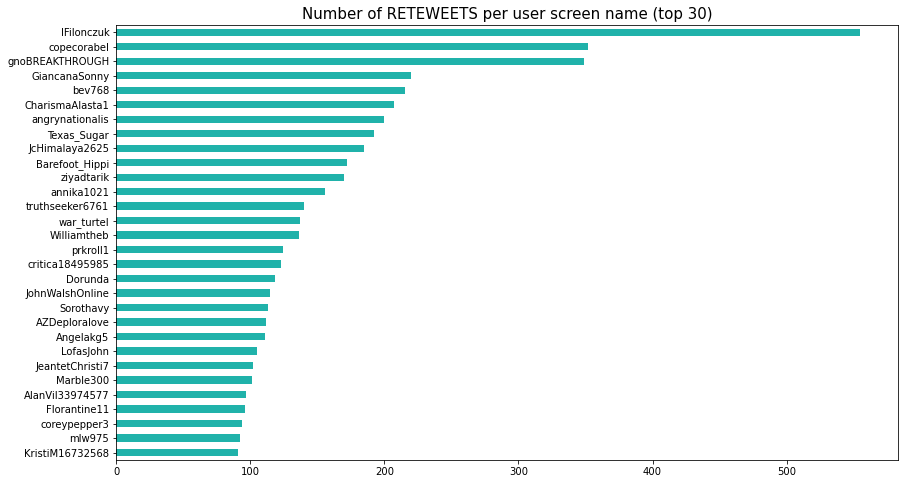

In [69]:
val = pd.Series(value_u)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of RETEWEETS per user screen name (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

In [72]:
value = val.index
df_rt_ccdh = pd.DataFrame({'user_screen_name':value, 'rt_number':val})
df_rt_ccdh.to_csv(path[0] + "retweet_users_ccdh.csv", index=False)

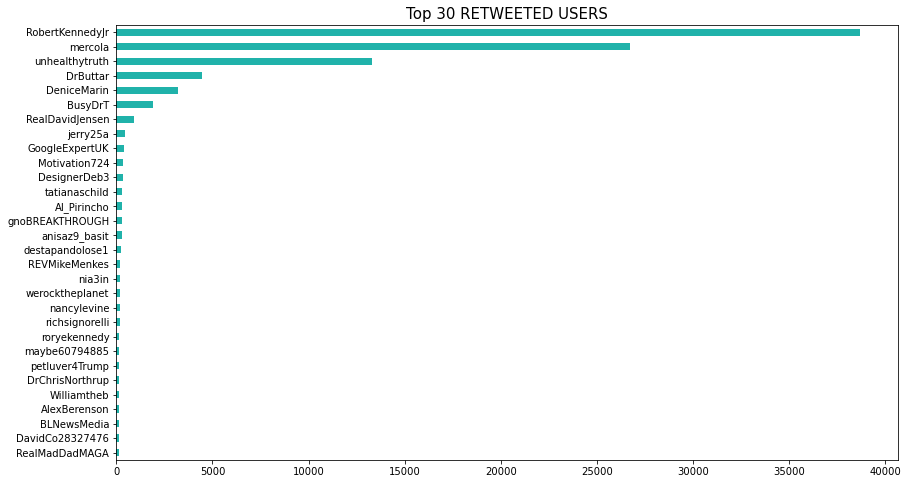

In [14]:
rt_names = val
val = pd.Series(retweet["rt_user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #green #steelblue
ax.set_title('Top 30 RETWEETED USERS', fontsize=15)
ax.invert_yaxis()
plt.show()

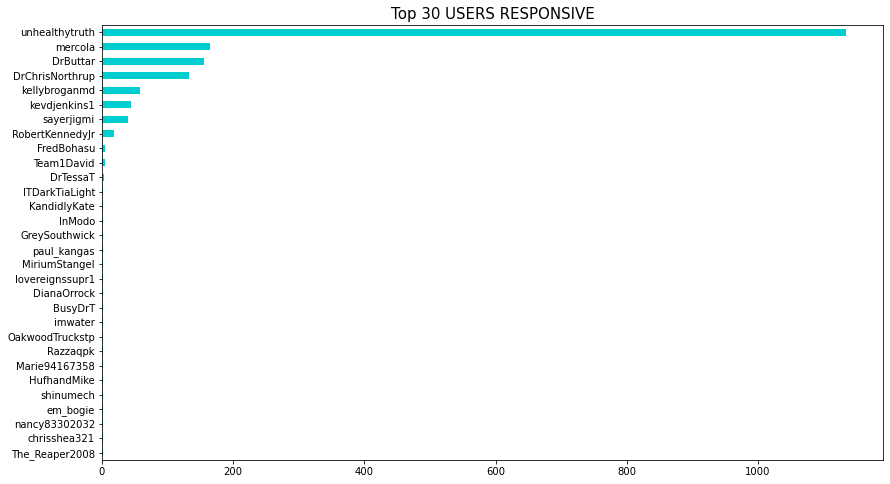

In [15]:
val = pd.Series(reply["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RESPONSIVE', fontsize=15)
ax.invert_yaxis()
plt.show()

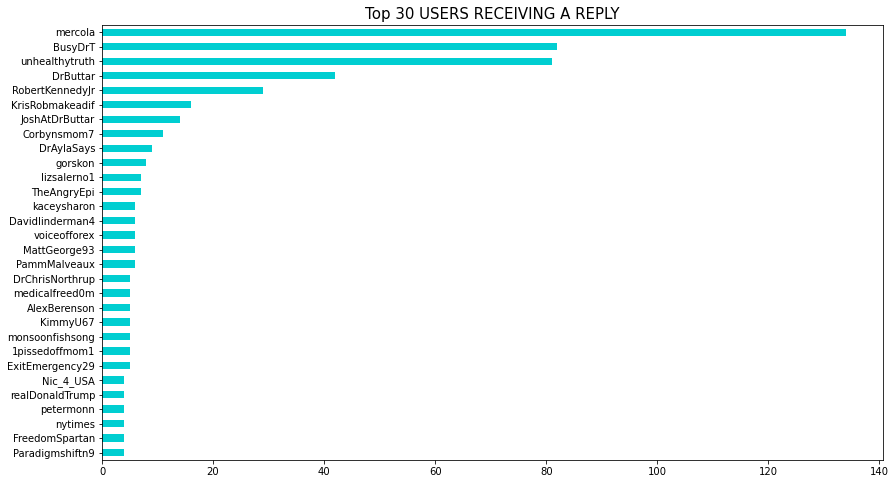

In [16]:
val = pd.Series(reply["in_reply_to_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RECEIVING A REPLY', fontsize=15)
ax.invert_yaxis()
plt.show()

## Verified Top Users
<a id="top_v"/>

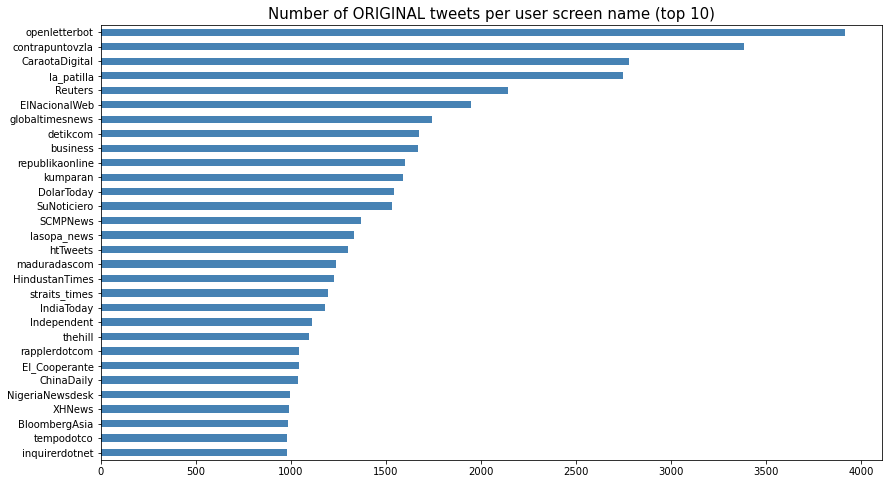

In [118]:
val = pd.Series(original_v["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of ORIGINAL tweets per user screen name (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

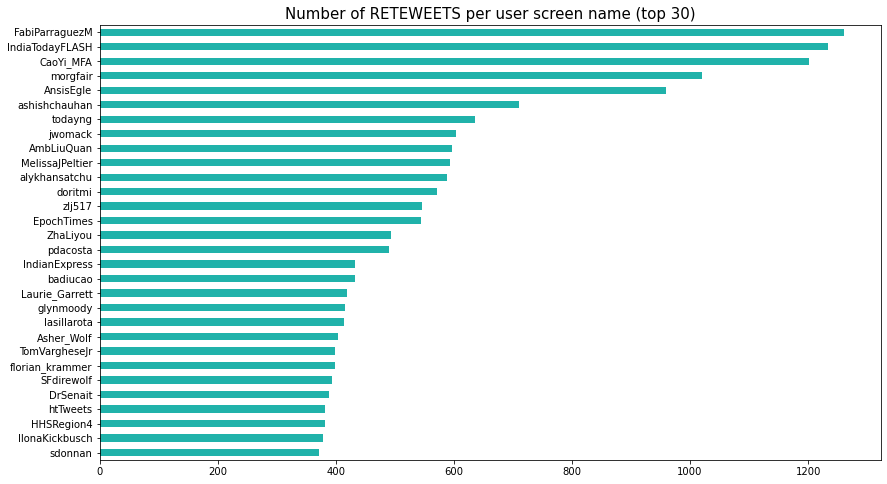

In [119]:
val = pd.Series(retweet_v["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of RETEWEETS per user screen name (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

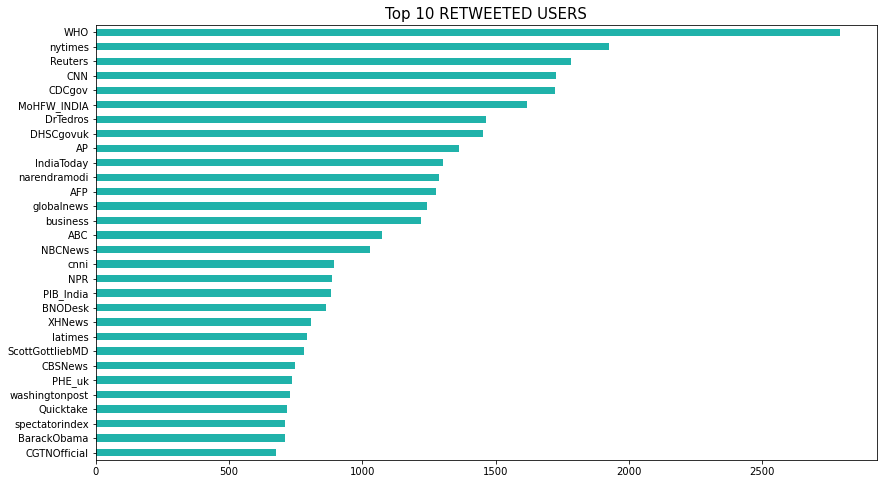

In [120]:
val = pd.Series(retweet_v["rt_user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #green #steelblue
ax.set_title('Top 10 RETWEETED USERS', fontsize=15)
ax.invert_yaxis()
plt.show()

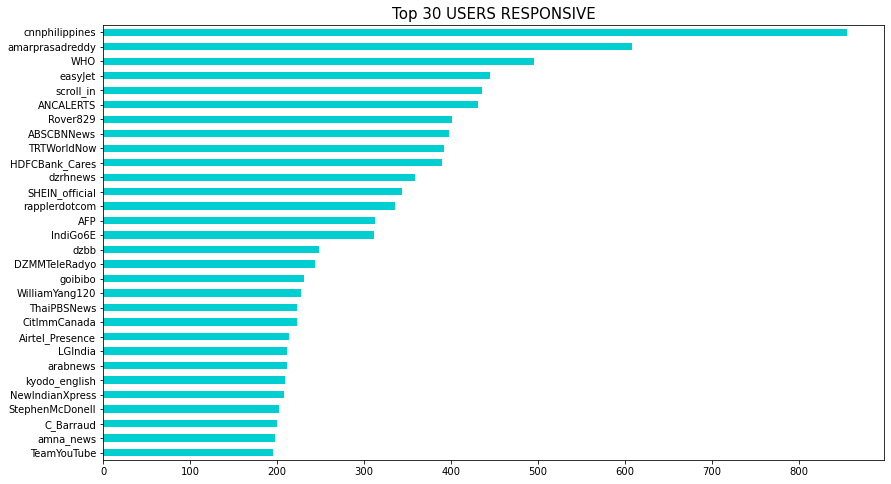

In [121]:
val = pd.Series(reply_v["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RESPONSIVE', fontsize=15)
ax.invert_yaxis()
plt.show()

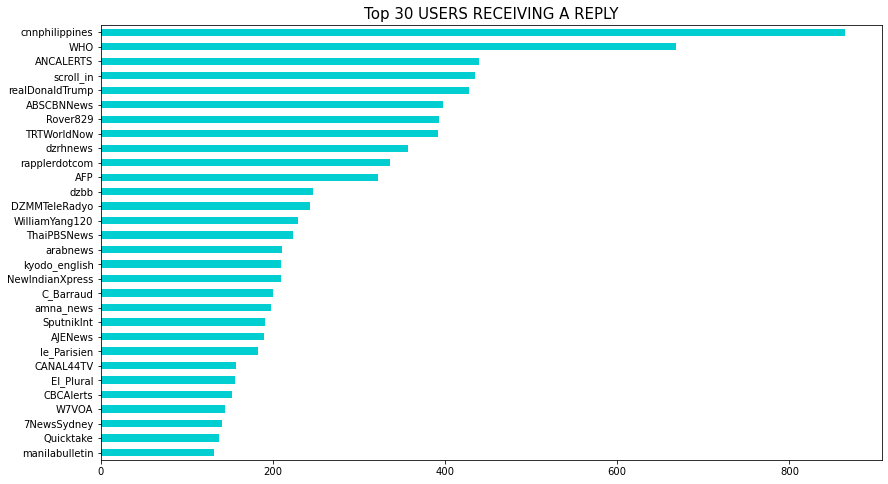

In [123]:
val = pd.Series(reply_v["in_reply_to_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RECEIVING A REPLY', fontsize=15)
ax.invert_yaxis()
plt.show()

### Hashtags CCDH
<a id="hastag_ccdh" />

In [17]:
tweets_with_hashtags = df.loc[df['hashtags'] != '[]']
print(f'Number of tweets with hashtags: {len(tweets_with_hashtags)}, {np.around(len(tweets_with_hashtags)*100/len(df),2)}% of total tweets')

Number of tweets with hashtags: 6149, 4.75% of total tweets


In [85]:
importlib.reload(tweets_utils)
hashtag = tweets_utils.hashtag_process(df)

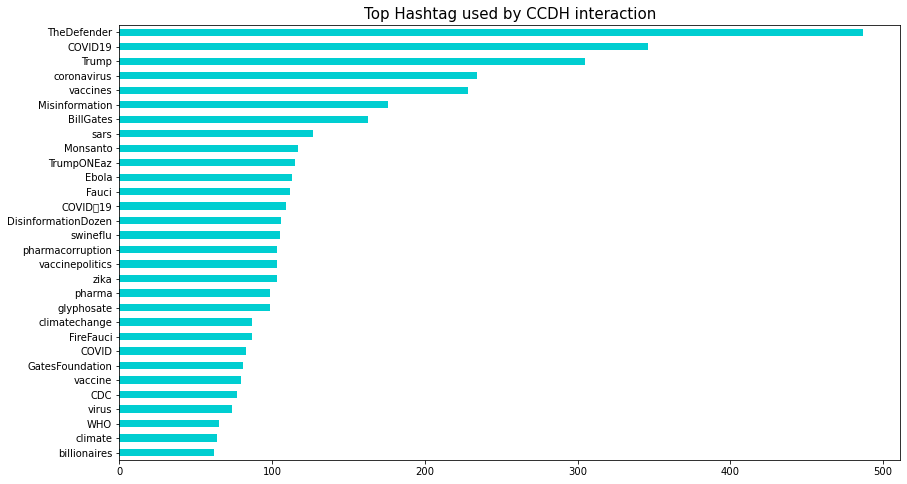

In [86]:
val = pd.Series(hashtag)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top Hashtag used by CCDH interaction', fontsize=15)
ax.invert_yaxis()
plt.show()

In [38]:
ccdh_hashtags = val[:13]
ccdh_hashtags = list(ccdh_hashtags.index)
ccdh_hashtags.remove("coronavirus")
ccdh_hashtags.remove("vaccines")
ccdh_hashtags.remove("COVID19")
ccdh_hashtags.remove("COVIDー19")

In [41]:
df_hashtags = pd.DataFrame({'hashtag': ccdh_hashtags})
df_hashtags.to_csv(path_disinform[0] + "hashtags_sus.csv", index=False,line_terminator='\n', encoding='utf-8')

### Hashtags Verified
<a id="hastag_verified" />

In [172]:
tweets_with_hashtags = df_v.loc[df_v['hashtags'] != '[]']
print(f'Number of tweets with hashtags: {len(tweets_with_hashtags)}, {np.around(len(tweets_with_hashtags)*100/len(df_v),2)}% of total tweets')

Number of tweets with hashtags: 665989, 39.47% of total tweets


In [88]:
importlib.reload(tweets_utils)
hashtag_v = tweets_utils.hashtag_process(df_v)

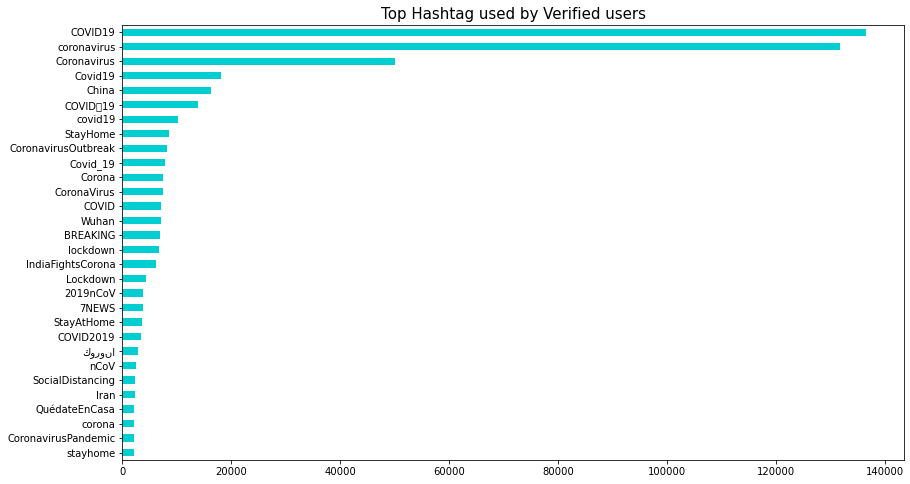

In [89]:
val = pd.Series(hashtag_v)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top Hashtag used by Verified users', fontsize=15)
ax.invert_yaxis()
plt.show()

### Urls CCDH
<a id="ccdh_urls"/>

In [15]:
path = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/")
credibility_url = pd.read_csv(path[0] + "domain_credibility.csv")
credibility_url

Domain Class
0               100percentfedup.com   low
1               100percentfedup.com  high
2                        10news.one   low
3                     12minutos.com   low
4                        12news.com  high
..                              ...   ...
820      childrenshealthdefense.org   low
821  AdvancedMedicineConference.com   low
822                         aol.com  high
823            trendingpolitics.com   low
824        charityauctionstoday.com   low

[825 rows x 2 columns]

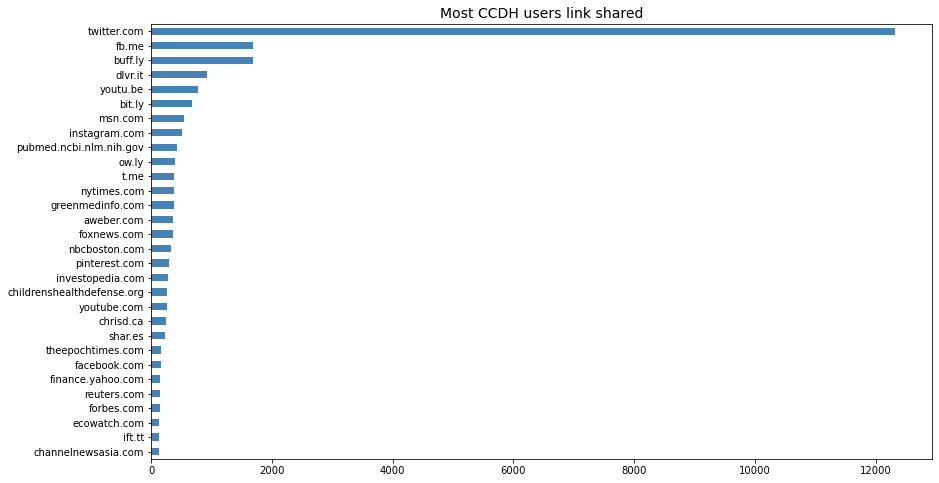

In [90]:
ccdh_urls = tweets_utils.format_urls(df["urls"])
val = pd.Series(ccdh_urls).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14))
ax.set_title('Most CCDH users link shared', fontsize=14)
ax.invert_yaxis()
plt.show()

#### Credibility

In [111]:
urls_series = pd.Series(ccdh_urls)
x = urls_series[urls_series.isin(list(credibility_url["Domain"]))]
x = x.unique()
x

In [112]:
new_list_c = []
for i in range(len(credibility_url["Domain"])):
    if credibility_url["Domain"][i] in list(x):
        new_list_c.append((credibility_url["Domain"][i], credibility_url["Class"][i]))

In [115]:
value_c = []
for j in ccdh_urls:
    for i in range(len(new_list_c)):
        if j in new_list_c[i][0]:
            value_c.append(new_list_c[i][1])

In [94]:
sizes = pd.Series(value_c).value_counts()
labels = 'high', 'low'
explode = [0,0.2]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [174]:
importlib.reload(tweets_utils)
ccdh_users = list(df["user_screen_name"].unique())
len(ccdh_users)

40002

In [25]:
def percentage_high_credibility(users, df, credibility_url):
    count = 0
    perc_list = []
    for i in users:
        count = count + 1
        x = df[df["user_screen_name"]==i]
        urls = tweets_utils.format_urls(x["urls"])
        cred_list = []
        value = 0
        value_h = 0
        if(len(urls) > 0):
            for j in range(len(credibility_url["Domain"])):
                if credibility_url["Domain"][j] in urls:
                    value = value + 1
                    if(credibility_url["Class"][j] == "high"):
                        value_h = value_h + 1
            if(value > 0) and (value_h) > 0:
                perc_high = value_h / value
            elif (value_h) == 0 and (value == 0):
                perc_high = -1
            elif (value_h == 0) and (value > 0):
                perc_high = 0
            perc_list.append((i, perc_high))
        if(count % 1000 == 0):
            print(count)
    return perc_list

In [4]:
start_time = time.perf_counter()
perc_list = percentage_high_credibility(ccdh_users, df, credibility_url)
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

In [180]:
a = []
b = []
for i in perc_list:
    a.append(i[0])
    b.append(i[1])

In [2]:
path_perc = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/")
path_perc[0]

'C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/'

In [182]:
df_perc = pd.DataFrame(list(zip(a, b)),
               columns =['user_screen_name', 'perc'])
df_perc.to_csv(path_perc[0] + "percentage_ccdh.csv", index=False)

In [5]:
df_perc = pd.read_csv(path_perc[0] + "percentage_ccdh.csv")
df_perc[df_perc["perc"]==0]

user_screen_name  perc
9         patriot7842   0.0
10            dihoppy   0.0
22          siaisfree   0.0
23          dad_liams   0.0
29       barb78405439   0.0
...               ...   ...
6290  retrotaxobscene   0.0
6292      KLG71341878   0.0
6297       1SofiaKing   0.0
6299        Danikullu   0.0
6300      PeetersErik   0.0

[317 rows x 2 columns]

### Urls Verified
<a id="ccdh_verified"/>

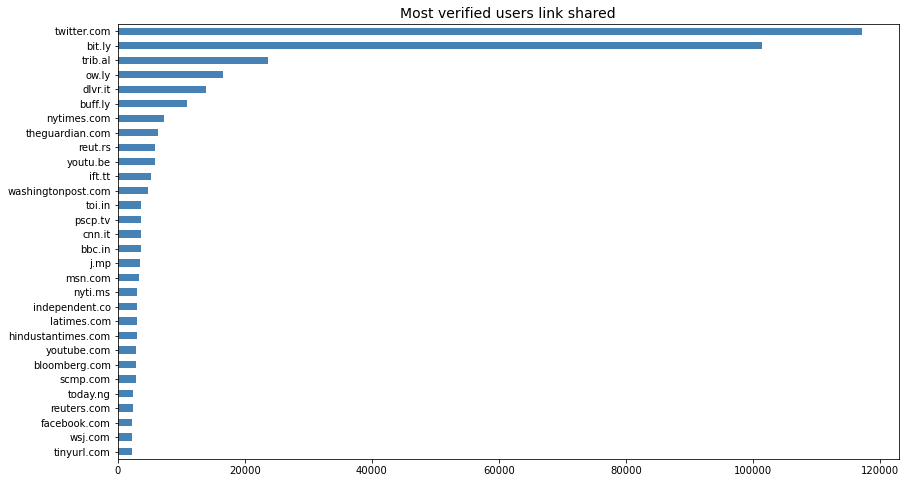

In [92]:
verified_urls = df_v["urls"]
ver = []
for v in verified_urls:
    if (v != "[]" ) and (not type(v) == float):
        ver.append(tweets_utils.url_decompress(v))
verified_urls = list(filter(lambda num: num != "0", ver))
verified_urls = tweets_utils.remove_www(verified_urls)
val = pd.Series(verified_urls).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14))
ax.set_title('Most verified users link shared', fontsize=14)
ax.invert_yaxis()
plt.show()

#### Credibility

In [17]:
new_list = []
for i in range(len(credibility_url["Domain"])):
    if credibility_url["Domain"][i] in verified_urls:
        new_list.append((credibility_url["Domain"][i], credibility_url["Class"][i]))

In [18]:
value = []
for j in verified_urls:
    for i in range(len(new_list)):
        if j in new_list[i][0]:
            value.append(new_list[i][1])

In [93]:
sizes = pd.Series(value).value_counts()
labels = 'high', 'low'
explode = [0,0.2]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [31]:
importlib.reload(tweets_utils)
df_test = df_v[df_v["urls"].notna()]
verified_users = list(df_test["user_screen_name"].unique())
len(verified_users)

143976

In [36]:
start_time = time.perf_counter()
ver_perc = percentage_high_credibility(verified_users, df_v, credibility_url)
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

In [34]:
a = []
b = []
for i in ver_perc:
    a.append(i[0])
    b.append(i[1])

In [35]:
path_perc[0]
df_perc = pd.DataFrame(list(zip(a, b)),
               columns =['user_screen_name', 'perc'])
df_perc.to_csv(path_perc[0] + "percentage_verified.csv", index=False)

In [42]:
df_perc[df_perc["perc"]<1 ]

user_screen_name      perc
0           HHSRegion8 -1.000000
1           SmithDanaG -1.000000
3            CDCtravel -1.000000
8             MackayIM  0.944444
9      MDedgeNeurology -1.000000
...                ...       ...
99317        eazydiner -1.000000
99318       brie_san11 -1.000000
99319          looliva -1.000000
99320  sandeepjethwani -1.000000
99321         EricIdle -1.000000

[79547 rows x 2 columns]

### Comparison between verified and ccdh link shared (high / total)
<a id="distrib_link"/>

In [38]:
df_ccdh_perc = pd.read_csv(path_perc[0] + "percentage_ccdh.csv")
df_ccdh_perc

user_screen_name      perc
0             mercola  0.972222
1     RobertKennedyJr  0.979167
2            DrButtar  0.533333
3      unhealthytruth  0.965517
4          sayerjigmi  0.600000
...               ...       ...
6319           InModo -1.000000
6320         jgrugeon  1.000000
6321       helenmary7 -1.000000
6322           tmwsiy -1.000000
6323     DrBenTapper1 -1.000000

[6324 rows x 2 columns]

In [39]:
df_v_perc = pd.read_csv(path_perc[0] + "percentage_verified.csv")
df_v_perc

user_screen_name  perc
0           HHSRegion8  -1.0
1           SmithDanaG  -1.0
2         MelissaFox26   1.0
3            CDCtravel  -1.0
4            AlainnaJJ   1.0
...                ...   ...
99317        eazydiner  -1.0
99318       brie_san11  -1.0
99319          looliva  -1.0
99320  sandeepjethwani  -1.0
99321         EricIdle  -1.0

[99322 rows x 2 columns]

In [40]:
df_ccdh_perc_plot = df_ccdh_perc[df_ccdh_perc["perc"] > -1] 
df_v_perc_plot = df_v_perc[df_v_perc["perc"] > -1]
print(len(df_v_perc_plot))
print(len(df_ccdh_perc_plot))

20104
2074


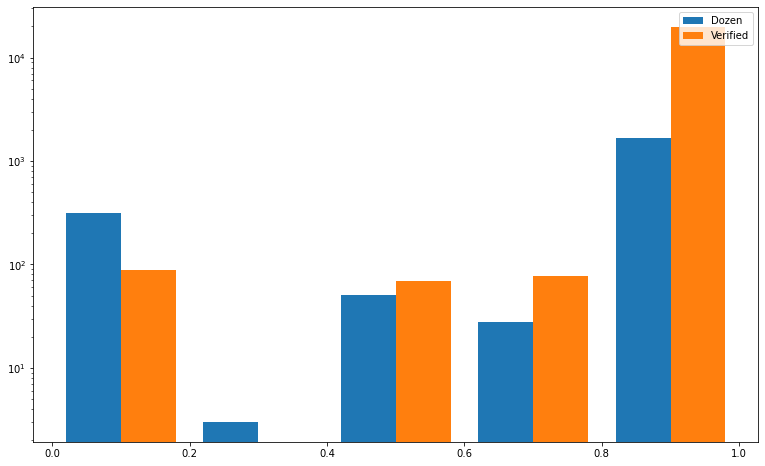

In [51]:
bins = [0,0.2,0.4, 0.6, 0.8, 1]
plt.hist([df_ccdh_perc_plot["perc"], df_v_perc_plot["perc"]], bins, label=['Dozen', 'Verified'])
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (13,8)
plt.yscale('log', nonposy='clip')
plt.show()

### CCDH bot score distribution
<a id="ccdh_bot"/>


In [52]:
path_bot = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/")
bot = pd.read_csv(path_bot[0] + "csv/bot_score.csv")
score = pd.read_csv(path_bot[0] + "large_files/user_score.csv")
score.drop_duplicates(subset ="user", keep = False, inplace = True)
score = score.reset_index(drop=True)
bot.drop_duplicates(subset ="user", keep = False, inplace = True)
bot = bot.reset_index(drop=True)

In [53]:
df_rt_score = score[score["user"].isin(value_u)]
df_rt_score

user     score
137           drea_ams  0.577886
172       SamSmith_PhD  0.621687
179               fl85  0.738478
214      swissbusiness  0.800880
272       drehorgel123  0.797161
...                ...       ...
27444            AMN06  0.796597
27456        rsarille4  0.796721
27478        netminnow  0.800880
27504  HIVplusYOUandME  0.766877
27509     WhighamPhoto  0.754622

[861 rows x 2 columns]

[0.4197222421546159, 0.6414184221423734, 0.7892294694438972, 0.8054784364249085, 0.8524047631581662]
Valore medio: 0.7060063048205133


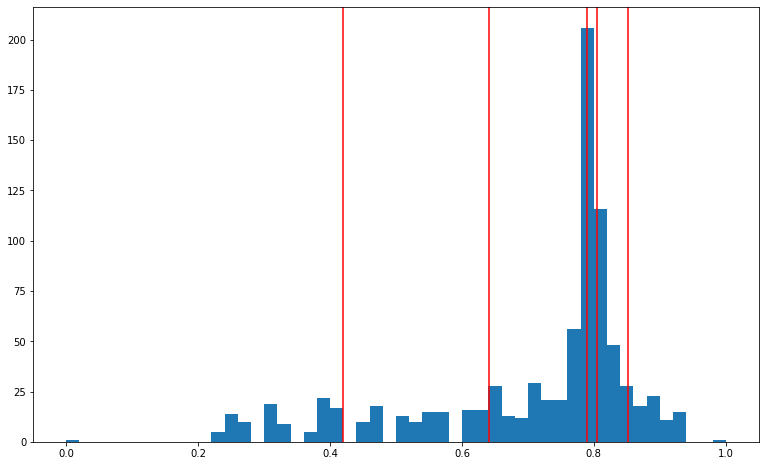

In [54]:
index = [10, 25, 50, 75, 90]
perc_numpy = [np.percentile(df_rt_score["score"], i, interpolation='nearest') for i in index]
print(perc_numpy)
print(f"Valore medio: {np.mean(df_rt_score.score)}")
plt.hist(df_rt_score["score"], 50)
for i in range(len(index)):
    plt.axvline(perc_numpy[i], color='r')
plt.show()

In [46]:
bot_rt_ccdh = bot[bot["user"].isin(value_u)]
bot_rt_ccdh

### Verified bot score distribution
<a id="verified_bot"/>

In [55]:
df_v_rt_score = score[score["user"].isin(retweet_v["user_screen_name"])]
df_v_rt_score

user     score
43         lasopa_news  0.891232
57          DolarToday  0.859506
72     redaccionmedica  0.891232
74         Independent  0.796599
76       TOICitiesNews  0.891232
...                ...       ...
26784        CNNnews18  0.796622
26933      FarrahFazal  0.761188
26937        joshspero  0.278726
27258         Jeeveshu  0.502712
27290      MartinSoong  0.787400

[2935 rows x 2 columns]

[0.3342309004634953, 0.6004883262510591, 0.7874002196908744, 0.7970609972920484, 0.8100783815308749]
Valore medio: 0.6796509295188975


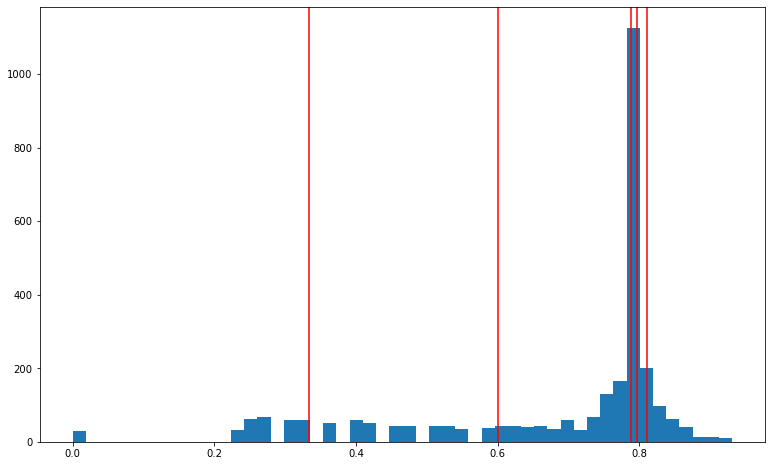

In [56]:
index = [10, 25, 50, 75, 90]
perc_numpy = [np.percentile(df_v_rt_score["score"], i, interpolation='nearest') for i in index]
print(perc_numpy)
print(f"Valore medio: {np.mean(df_v_rt_score.score)}")
plt.hist(df_v_rt_score["score"], 50)
for i in range(len(index)):
    plt.axvline(perc_numpy[i], color='r')
plt.show()

In [44]:
# df_v_bot = bot[bot["user"].isin(retweet_v["user_screen_name"])]
# df_v_bot

### Comparison between distributions
<a id="comp"/>

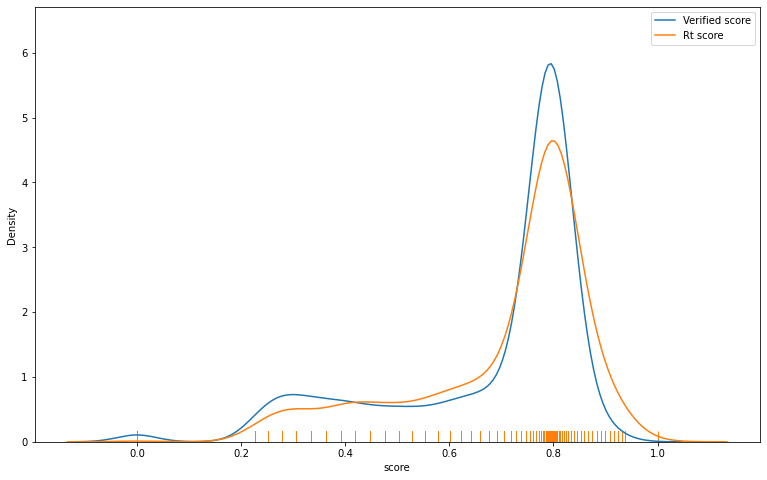

In [57]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

sns.distplot(df_v_rt_score["score"], hist=False, rug=True)
sns.distplot(df_rt_score["score"], hist=False, rug=True)
plt.legend(labels=["Verified score","Rt score"])
plt.rcParams["figure.figsize"] = (13,8)
plt.show()

In [47]:
print(len(df_v_rt_score["score"]))
print(len(df_rt_score["score"]))

2935
861


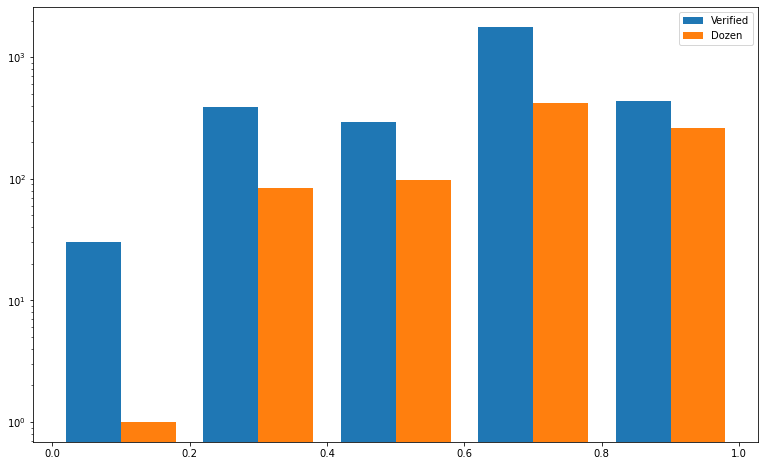

In [59]:
# frequenza occorrenze
bins = [0,0.2,0.4, 0.6, 0.8, 1]
plt.hist([df_v_rt_score["score"], df_rt_score["score"]], bins, label=['Verified', 'Dozen'])
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (13,8)
plt.yscale('log', nonposy='clip')
plt.show()

# Comparison dozen and verified accounts (high credibility)

In [60]:
df_dozen = df[df["user_screen_name"].isin(list(disinform["screen_name"]))]

In [61]:
# file_verified = ["SmithDanaG","AlainnaJJ","DrAbdiMahamud", "MackayIM", "jwgale", "DrEricDing", "IlonaKickbusch"]
file_verified = ["DrDenaGrayson", "MackayIM", "DrEricDing", "IlonaKickbusch", "ashishkjha", 
                 "HelenBranswell", "mlipsitch", "trvrb", "kakape", "edyong209", "CDCDirector",
                "DrTedros"]
df_verified = df_v[df_v["user_screen_name"].isin(file_verified)]

In [68]:
# df_dozen

In [67]:
# df_verified

In [64]:
original_dozen = df_dozen[df_dozen['rt_user_id'].isna() & df_dozen['in_reply_to_user_id'].isna()]
retweet_dozen = df_dozen[df_dozen['rt_user_id'].notna()]
reply_dozen = df_dozen[df_dozen['in_reply_to_user_id'].notna()]
total_len = len(df_dozen)
len_original = len(original_dozen)
len_rt = len(retweet_dozen)
len_rp = len(reply_dozen)

original_verified = df_verified[df_verified['rt_user_id'].isna() & df_verified['in_reply_to_user_id'].isna()]
retweet_verified = df_verified[df_verified['rt_user_id'].notna()]
reply_verified = df_verified[df_verified['in_reply_to_user_id'].notna()]
total_len_v = len(df_verified)
len_original_v = len(original_verified)
len_rt_v = len(retweet_verified)
len_rp_v = len(reply_verified)

### Stats
<a id="c_stats"/>

In [66]:
list_ccdh = [(len_original/total_len), (len_rt/total_len), (len_rp/total_len)]
labels = ["Original", "Retweet", "Reply"]
list_verified = [len_original_v/total_len_v, len_rt_v/total_len_v, len_rp_v/total_len_v]
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="sum", y=list_ccdh, x=label_ccdh, name="Bad"))
fig.add_trace(go.Histogram(histfunc="sum", y=list_verified, x=label_ccdh, name="Good"))
fig.update_layout(
    title="Differences between Bad Dozen and Good Dzen activity",
    xaxis_title="Kind of activity",
    yaxis_title="Percentage of activity",
    legend_title="Legend Title")
fig.show()

### Retweetted users
<a id="rt"/>

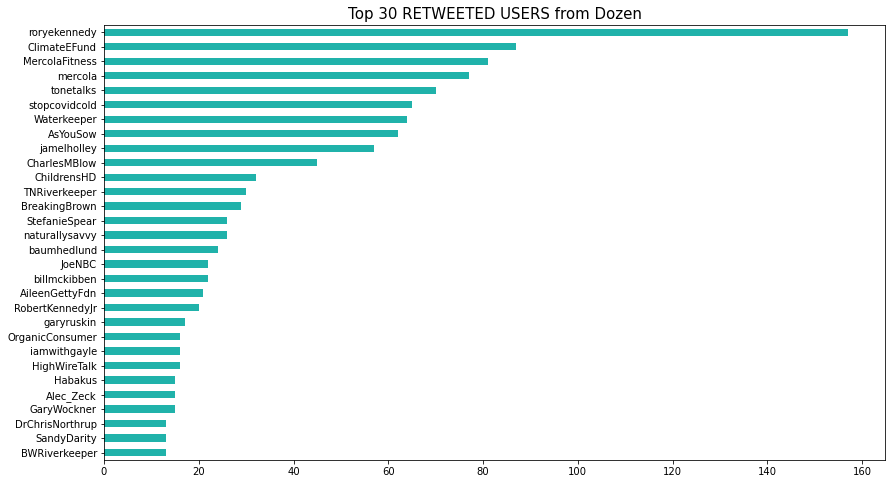

In [26]:
val = pd.Series(retweet_dozen["rt_user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #green #steelblue
ax.set_title('Top 30 RETWEETED USERS from Dozen', fontsize=15)
ax.invert_yaxis()
plt.show()

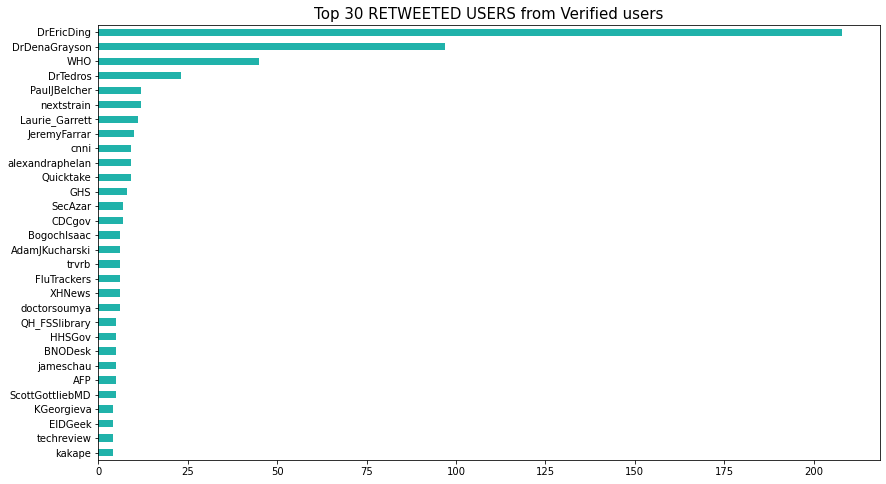

In [27]:
val = pd.Series(retweet_verified["rt_user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #green #steelblue
ax.set_title('Top 30 RETWEETED USERS from Verified users', fontsize=15)
ax.invert_yaxis()
plt.show()

### Link shared
<a id="link_sh"/>

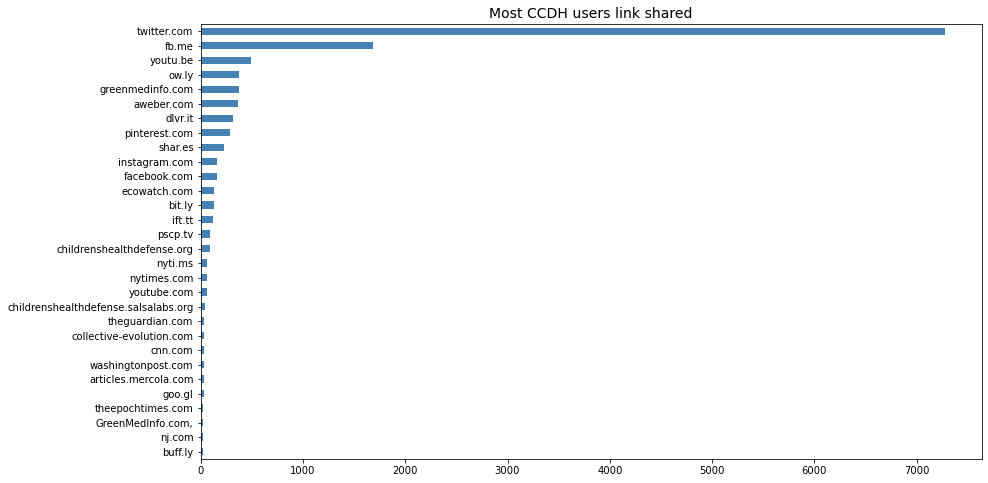

In [78]:
dozen_urls = df_dozen["urls"]
dozen_urls = [tweets_utils.url_decompress(v) if v != "[]" else "0" for v in dozen_urls]
dozen_urls = list(filter(lambda num: num != "0", dozen_urls))
dozen_urls = tweets_utils.remove_www(dozen_urls)
val = pd.Series(dozen_urls).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14))
ax.set_title('Most CCDH users link shared', fontsize=14)
ax.invert_yaxis()
plt.show()

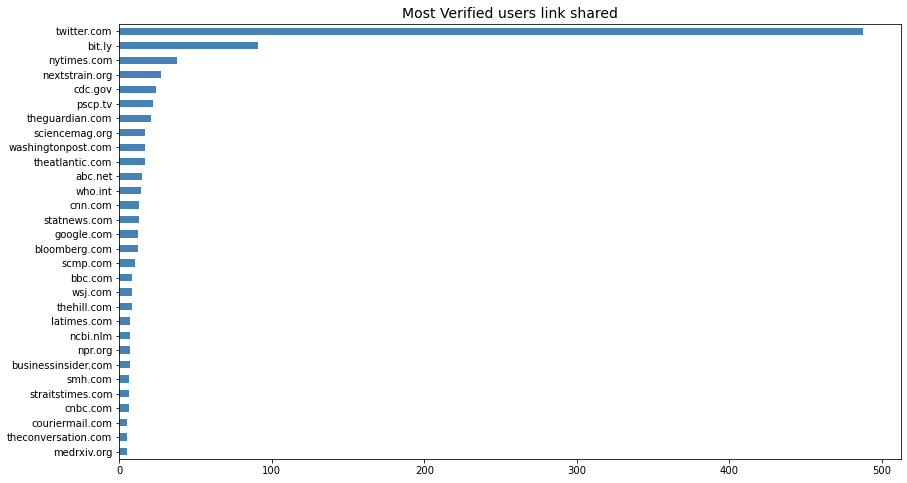

In [72]:
v_urls = df_verified["urls"]
v_urls = [tweets_utils.url_decompress(v) if v != "[]" else "0" for v in v_urls]
v_urls = list(filter(lambda num: num != "0", v_urls))
v_urls = tweets_utils.remove_www(v_urls)
val = pd.Series(v_urls).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14))
ax.set_title('Most Verified users link shared', fontsize=14)
ax.invert_yaxis()
plt.show()

### Hashtags
<a id="comp_hashtag"/>

In [95]:
# df_dozen, df_verified

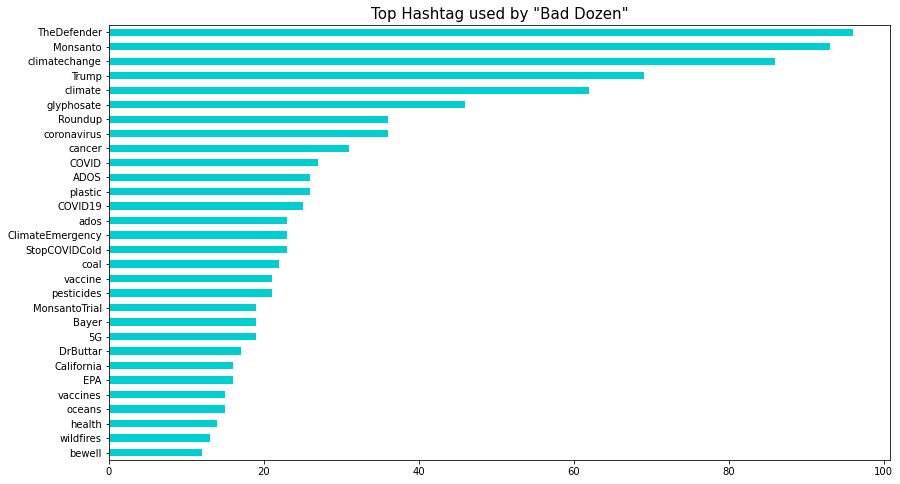

In [105]:
hashtag = tweets_utils.hashtag_process(df_dozen)
val = pd.Series(hashtag)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top Hashtag used by "Bad Dozen"', fontsize=15)
ax.invert_yaxis()
plt.show()

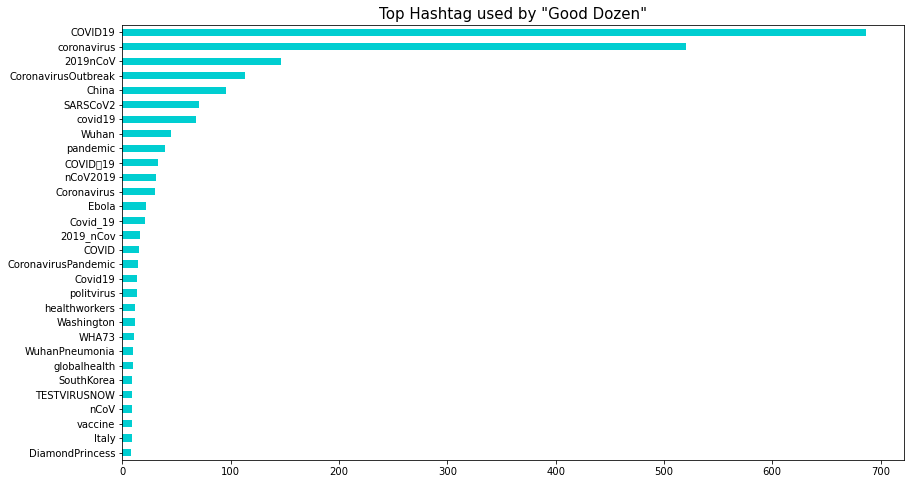

In [104]:
hashtag = tweets_utils.hashtag_process(df_verified)
val = pd.Series(hashtag)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top Hashtag used by "Good Dozen"', fontsize=15)
ax.invert_yaxis()
plt.show()